In [1]:
from nilm_analyzer.loaders import REFIT_Loader

In [2]:
refit_data = REFIT_Loader(data_path='D:/data/external/refit/')

Fetching the meter_appliance mapping from REFIT metadata: D:\Repos\set_3\nilm_analyzer\metadata\refit

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Dataset successfully loaded!


In [6]:
appliance_data = refit_data.get_appliance_data(appliance='dish washer', houses=[1,2,3,4,5])

Loading data for appliance DISH WASHER ...
Fetching DISH WASHER data for House 1
Fetching DISH WASHER data for House 2
Fetching DISH WASHER data for House 3
Appliance 'DISH WASHER' does not exist in house 4.
Fetching DISH WASHER data for House 5


In [7]:
appliance_data.resample(sampling_period='8s')

Resampling for house number:  1
sampling_period = 8s, window_limit = 120 samples, fill_value = 0.0

Resampling for house number:  2
sampling_period = 8s, window_limit = 120 samples, fill_value = 0.0

Resampling for house number:  3
sampling_period = 8s, window_limit = 120 samples, fill_value = 0.0

Resampling for house number:  5
sampling_period = 8s, window_limit = 120 samples, fill_value = 0.0

Updating data with resampled dataset...


In [8]:
appliance_data.data

{1:                      aggregate  dish washer
 time                                       
 2013-10-09 13:06:16      523.0          0.0
 2013-10-09 13:06:24      523.0          0.0
 2013-10-09 13:06:32      526.0          0.0
 2013-10-09 13:06:40      526.0          0.0
 2013-10-09 13:06:48      540.0          0.0
 ...                        ...          ...
 2015-07-10 11:56:00      180.0          0.0
 2015-07-10 11:56:08      186.0          0.0
 2015-07-10 11:56:16      181.0          0.0
 2015-07-10 11:56:24      186.0          0.0
 2015-07-10 11:56:32      182.0          0.0
 
 [6900678 rows x 2 columns],
 2:                      aggregate  dish washer
 time                                       
 2013-09-17 22:08:08      695.0          0.0
 2013-09-17 22:08:16      694.0          0.0
 2013-09-17 22:08:24      694.0          0.0
 2013-09-17 22:08:32      702.0          0.0
 2013-09-17 22:08:40      700.0          0.0
 ...                        ...          ...
 2015-05-28 08:05:

In [32]:
appliance_data.get_activations(threshold_x=10.0, threshold_y=0.025)

Extracting activations for House 1
Consumption Threshold is set to = 63.125
Time Delay Threshold is set to = 10.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 2
Consumption Threshold is set to = 62.0
Time Delay Threshold is set to = 10.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 3
Consumption Threshold is set to = 96.0
Time Delay Threshold is set to = 10.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 5
Consumption Threshold is set to = 66.175
Time Delay Threshold is set to = 10.0 minutes
Estimating active durations of: dish washer
Updating activations with durations when appliance is active (above threshold).


In [33]:
appliance_data.activations[1].sort_values(by='duration_in_seconds', ascending=False)

,activity_start,activity_end,duration_in_seconds
168,2015-03-06 02:09:52,2015-03-06 04:13:20,6440.0
48,2014-03-07 01:57:44,2014-03-07 04:00:48,6392.0
24,2013-12-16 02:29:04,2013-12-16 04:32:48,6352.0
65,2014-04-05 11:44:56,2014-04-05 13:40:48,5848.0
110,2014-10-16 03:43:44,2014-10-16 05:38:48,5648.0
...,...,...,...
33,2013-12-26 23:18:16,2013-12-26 23:33:52,936.0
135,2014-12-25 20:24:00,2014-12-25 20:41:20,936.0
133,2014-12-25 11:17:52,2014-12-25 11:35:20,760.0
31,2013-12-25 18:29:20,2013-12-25 18:46:40,736.0


<AxesSubplot:xlabel='time'>

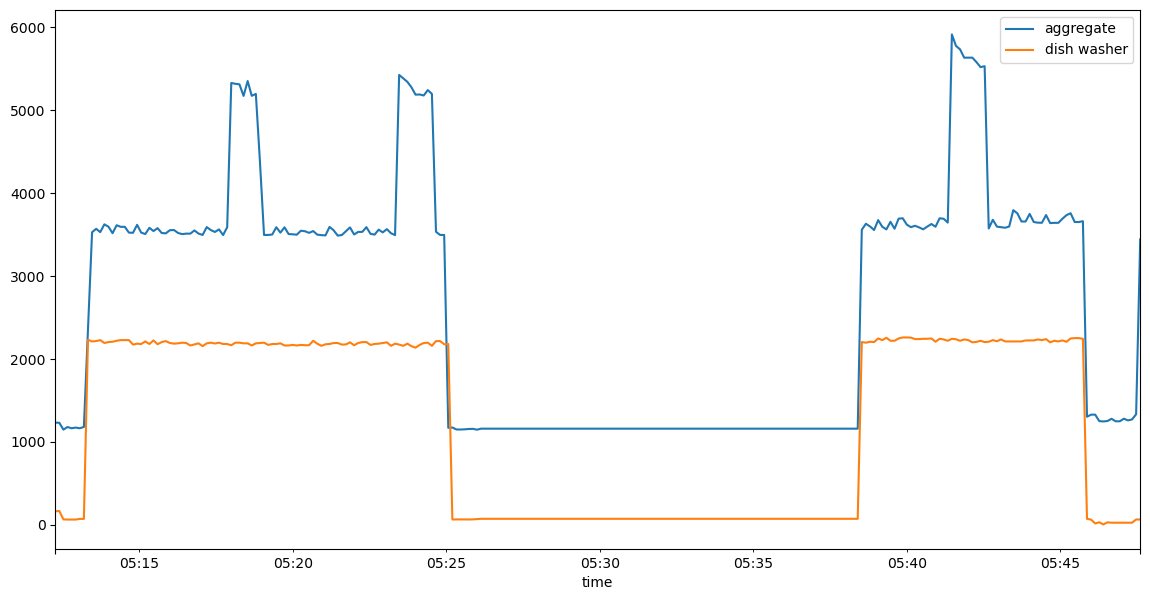

In [34]:
appliance_data.data[1].loc['2015-02-21 05:12:16':'2015-02-21 05:47:36'].plot(figsize=(14,7))